<a href="https://github.com/hernansalinas/autogrades/tree/main/Evaluaciones/Evaluacion01_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Parcial 01: Metodos computacionales para fisicos 
### Fecha 3/30/23

La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno. 

## 1. (50%). Movimiento de una esfera de radio r en un fluido.

 Una esfera de radio $R$ que asciende o desciende por un fluido puede ser modelada a través de un modelo de partícula, sometida a tres fuerzas: el peso, el empuje y la fuerza rozamiento. Las  ecuaciones de posición (x) y velocidad (v) para un sistema de refencia úbicado en la base del fluido, pueden ser escritas como:

\begin{equation}
x = \frac{G}{\alpha^2} \left( 1+\frac{\alpha v_0}{G} \right)(1-e^{-\alpha t}) - \frac{G}{\alpha}t
\end{equation}

\begin{equation}
v= \left ( v_0 +\frac{G}{\alpha} \right )e^{-\alpha t} - \frac{G}{\alpha}
\end{equation}



donde $G=\left( 1-\frac{\rho_f}{\rho} \right)g$, con $\rho_f$, $\rho$ la densidad del fluido y la esfera respectivamente y $g=9.8$ la aceleración de la gravedad y $\alpha$  una constante que depende del radio de la esfera, la viscosidad y la densidad.
$\alpha=\frac{9\eta}{2R^2\rho}$.

Suponga que una esferita de radio $R=2\times10^{-5}m$ es lanzada verticalmente hacia arriba en el agua, con una rapidez de $v_0=0.01$m/s.
Tomando la densidad del agua en  $\rho_f =1000 kg/m^3$,  la densidad de la esfera en $\rho=2670 kg/m^3$ y la viscosidad en $\eta=0.001 kg/ms$.  Determine: 

1. El tiempo total en que la esfera asciende  y desciende. 

2. Determine la rapidez final, con la que llega nuevamente de donde fue lanzada. 



Para ello construya un programa en python que:
- Permita calcular la posición como función del tiempo
- Permita calcular la rapidez como función del tiempo
- Cálcule  el tiempo total de subida y bajada empleando el método de la secante.

 



## 2. (50%). Interpolación
Para los siguientes datos de temperatura media como función del tiempo de los últimos años de  Bogotá y Barcelona ([Temperature_Bogota_Barcelona](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)). Aplique el método de  hermite y spline cúbicos. Para ello realice lo siguiente:

1. Leer el dataset desde la url, con el comando pd.read_csv.
2. Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius. $ C=(F-32)/1.8$
3. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.
4. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Barcelona.
4. Aplique el  metodos de interpolación de hermite para Bogotá y el metodo de interpolación de splines cubicos para Barcelona. 


Ayuda :

| Comando | Descripción |
| --- | --- |
| pd.read_csv() | Lee un archivo CSV y lo convierte en un DataFrame de Pandas |
| pd.read_excel() | Lee un archivo de Excel y lo convierte en un DataFrame de Pandas |
| pd.read_json() | Lee un archivo JSON y lo convierte en un DataFrame de Pandas |
| df.head() | Muestra las primeras filas del DataFrame |
| df.tail() | Muestra las últimas filas del DataFrame |
| df.info() | Muestra información sobre el DataFrame |
| df.describe() | Muestra estadísticas descriptivas del DataFrame |
| df.dropna() | Elimina filas con valores faltantes |
| df.drop_duplicates() | Elimina filas duplicadas |
| df.groupby() | Agrupa el DataFrame por una o más columnas |
| df.sort_values() | Ordena el DataFrame por una o más columnas |
| df.to_csv() | Guarda el DataFrame como un archivo CSV |
| df.loc[condicion] | Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones |
| df[df["columna"]== x] | Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable |


Referencias: 

- Dataset tomado y modificado de : https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

- http://www.sc.ehu.es/sbweb/fisica3/fluidos/stokes_1/stokes_1.html
- Lindemuth J. The effect of air resistance on falling balls. Am. J. Phys. 39, July 1971, pp. 757-759


### **Desarrollo parcial**

1. Movimiento de una esfera de radio r en un fluido

In [37]:
# Se importan las librerías

import numpy as np
import pandas as pd
import sympy as sy
import scipy as sp
import matplotlib.pylab as plt

In [68]:
''' Datos iniciales '''

df = 1000 # kg/m3 ---> densidad del agua
d = 2670 # kg/m3 ---> densidad de la esfera
G = (1 - df/d) # constante
g = 9.8 # gravedad 
R = 2e-5 # radio de la esfera
n = 0.001 # kg/ms ---> viscosidad
alfha = 9*n / (2*R**2*d) # constante que depende del radio de la esfera, la viscosidad y la densidad
v0 = 0.01 # m/s ---> rapidez

\begin{equation}
x = \frac{G}{\alpha} \left( 1+\frac{\alpha v_0}{G} \right)(1-e^{-\alpha t}) - \frac{G}{\alpha}t
\end{equation}

\begin{equation}
v= \left ( v_0 +\frac{G}{\alpha} \right )e^{-\alpha t} - \frac{G}{\alpha}
\end{equation}



In [58]:
def pos(t):
  f1 = G/alfha**2
  f2 = (1 + alfha*v0 / G)
  f3 =(1 -np.exp(-alfha*t))
  f4 = G/alfha * t
  f = f1*f2*f3 -f4
  return f

def vel(t):
  g1 = (v0 + G/alfha)
  g2 = np.exp(-alfha*t)
  g3 = G/alfha
  g = g1*g2 - g3
  return g

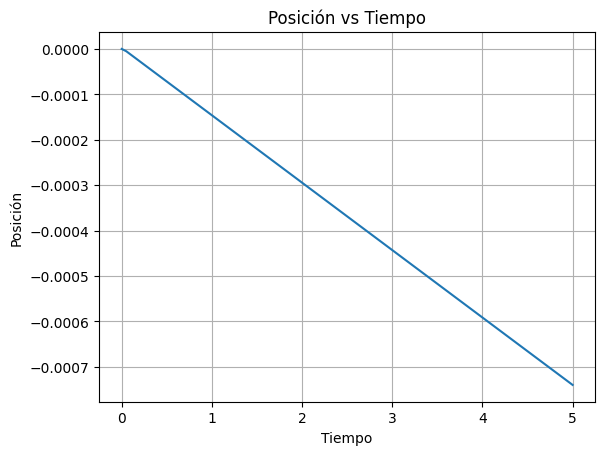

In [66]:
t = np.linspace(0, 5, 100)
plt.plot(t, pos(t))
plt.title("Posición vs Tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Posición")
plt.grid()

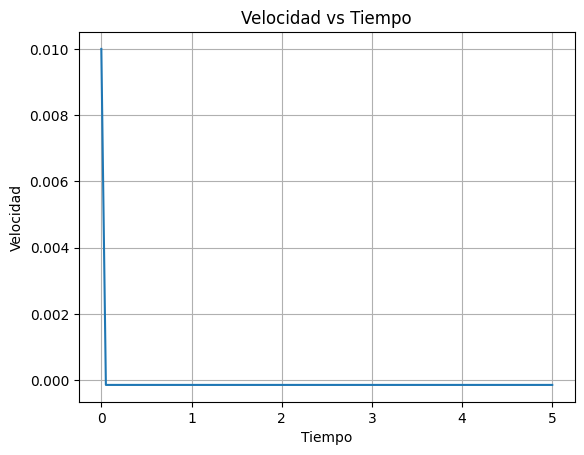

In [67]:
t = np.linspace(0, 5, 100)
plt.plot(t, vel(t))
plt.title("Velocidad vs Tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Velocidad")
plt.grid()

In [82]:
# Para verificar los ceros de las funciones usamos bisección

from scipy.optimize import bisect

cero1 = bisect(pos, -2, 2)
print("El cero de la función posición es", cero1)

cero2 = bisect(vel, -1, 1)
print("El cero de la función velocidad es", cero2)

El cero de la función posición es 0.0
El cero de la función velocidad es 0.0010027012776845368


In [74]:
t = sy.symbols('t') # Se define t como una variable simbólica

# Se definen las funciones con sympy
def pos_(t):
  return G/alfha * (1 + alfha*v0 / G)* (1 - sy.exp(-alfha*t)) - G/alfha * t

def vel_(t):
  return (v0 + G/alfha) * sy.exp(-alfha*t) - G/alfha

# Se hallan las derivadas de las funciones
pos_prima = sy.diff(pos_(t))
vel_prima = sy.diff(vel_(t))

In [76]:
# Se comvierten las derivadas en objetos de numpy

posprima = sy.lambdify(t, pos_prima, "numpy")
velprima = sy.lambdify(t, vel_prima, "numpy")

In [77]:
# Raices del polonomio por el método de la secante

from scipy.optimize import newton

raices1 = newton(pos, 0, posprima)
raices1

0.0

In [113]:
raices2 = newton(vel, 0.001, velprima)
raices2

In [ ]:
# Tiempo total de subida y bajada

2. Interpolación

In [49]:
from numpy.lib.function_base import insert

# Leer el dataset
datos = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv')
datos

,Unnamed: 0,Year,City,Month,Day,AvgTemperature
0,0,1995,Barcelona,6.526027,15.720548,62.019178
1,1,1995,Bogota,6.526027,15.720548,54.963014
2,2,1996,Barcelona,6.513661,15.756831,61.125956
3,3,1996,Bogota,6.513661,15.756831,55.083333
4,4,1997,Barcelona,6.526027,15.720548,62.612329
5,5,1997,Bogota,6.526027,15.720548,56.231507
6,6,1998,Barcelona,6.526027,15.720548,60.273973
7,7,1998,Bogota,6.526027,15.720548,49.642466
8,8,1999,Barcelona,6.526027,15.720548,61.204658
9,9,1999,Bogota,6.526027,15.720548,52.231781


In [92]:
# Agrego la columna de la Temperatura en Celsius

C = datos['AvgTemperature']
datos['AvgTempCelcius'] = (C - 32 / 1.8)
datos

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
0,0,1995,Barcelona,6.526027,15.720548,62.019178,44.241400
1,1,1995,Bogota,6.526027,15.720548,54.963014,37.185236
2,2,1996,Barcelona,6.513661,15.756831,61.125956,43.348179
3,3,1996,Bogota,6.513661,15.756831,55.083333,37.305556
4,4,1997,Barcelona,6.526027,15.720548,62.612329,44.834551
5,5,1997,Bogota,6.526027,15.720548,56.231507,38.453729
6,6,1998,Barcelona,6.526027,15.720548,60.273973,42.496195
7,7,1998,Bogota,6.526027,15.720548,49.642466,31.864688
8,8,1999,Barcelona,6.526027,15.720548,61.204658,43.426880
9,9,1999,Bogota,6.526027,15.720548,52.231781,34.454003


In [100]:
Bogota = datos[datos["City"] == 'Bogota']	# Filtro Bogotá
Bogota

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
1,1,1995,Bogota,6.526027,15.720548,54.963014,37.185236
3,3,1996,Bogota,6.513661,15.756831,55.083333,37.305556
5,5,1997,Bogota,6.526027,15.720548,56.231507,38.453729
7,7,1998,Bogota,6.526027,15.720548,49.642466,31.864688
9,9,1999,Bogota,6.526027,15.720548,52.231781,34.454003
11,11,2000,Bogota,6.513661,15.756831,54.918579,37.140801
13,13,2001,Bogota,6.526027,15.720548,55.416164,37.638387
15,15,2002,Bogota,6.526027,15.720548,54.686849,36.909072
17,17,2003,Bogota,6.526027,15.720548,54.973425,37.195647
19,19,2004,Bogota,6.513661,15.756831,55.598087,37.820310


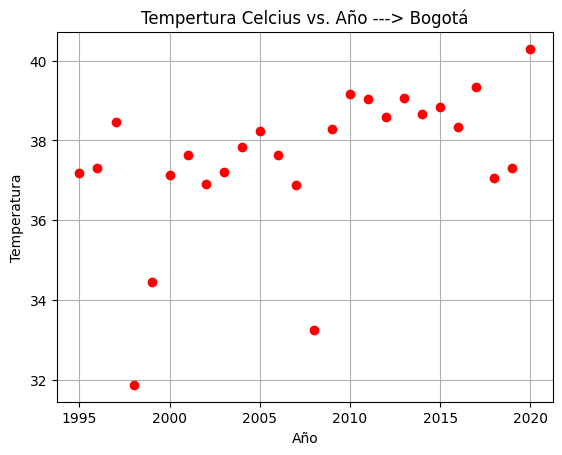

In [104]:
x = Bogota['Year']
y = Bogota['AvgTempCelcius']

plt.plot(x, y, "ro")
plt.title("Tempertura Celcius vs. Año ---> Bogotá")
plt.xlabel("Año")
plt.ylabel("Temperatura")
plt.grid()

In [111]:
# Interpolación por el método de Hermite
from scipy.interpolate import CubicHermiteSpline

In [115]:
# Derivada
prima = np.diff(y)
 
Bog_int = CubicHermiteSpline(x[1:], y[1:], prima)

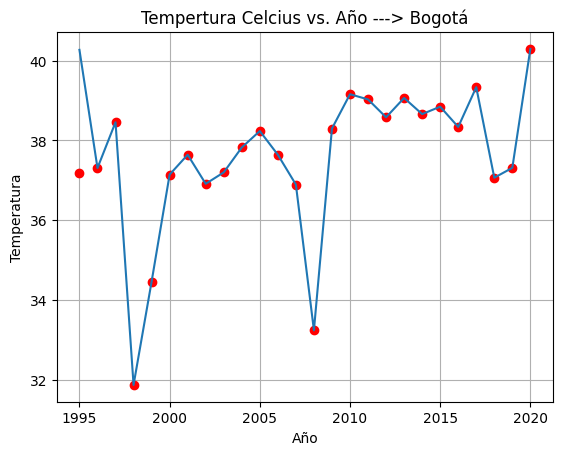

In [117]:
plt.plot(x, y, "ro")
plt.title("Tempertura Celcius vs. Año ---> Bogotá")
plt.plot(x, Bog_int(x))
plt.xlabel("Año")
plt.ylabel("Temperatura")
plt.grid()

In [112]:
Barcelona = datos[datos["City"] == 'Barcelona']	# Filtro Barcelona
Barcelona

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
0,0,1995,Barcelona,6.526027,15.720548,62.019178,44.241400
2,2,1996,Barcelona,6.513661,15.756831,61.125956,43.348179
4,4,1997,Barcelona,6.526027,15.720548,62.612329,44.834551
6,6,1998,Barcelona,6.526027,15.720548,60.273973,42.496195
8,8,1999,Barcelona,6.526027,15.720548,61.204658,43.426880
10,10,2000,Barcelona,6.513661,15.756831,60.069399,42.291621
12,12,2001,Barcelona,6.526027,15.720548,59.279452,41.501674
14,14,2002,Barcelona,6.526027,15.720548,58.044110,40.266332
16,16,2003,Barcelona,6.526027,15.720548,63.139452,45.361674
18,18,2004,Barcelona,6.513661,15.756831,62.875137,45.097359


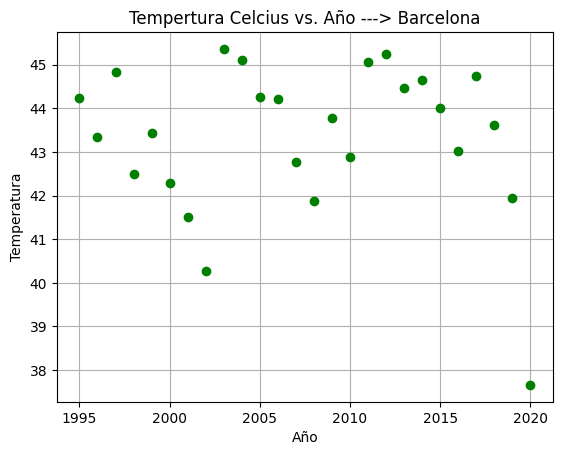

In [107]:
x1 = Barcelona['Year']
y1 = Barcelona['AvgTempCelcius']

plt.plot(x1, y1, "go")
plt.title("Tempertura Celcius vs. Año ---> Barcelona")
plt.xlabel("Año")
plt.ylabel("Temperatura")
plt.grid()

In [109]:
# Interpolación por el método de CubicSpline
from scipy.interpolate import CubicSpline

In [119]:
Bar_int = CubicSpline(x1, y1, 0)

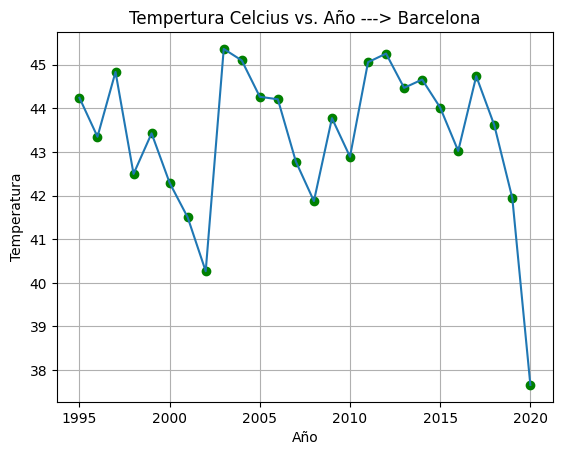

In [120]:
plt.plot(x1, y1, "go")
plt.title("Tempertura Celcius vs. Año ---> Barcelona")
plt.plot(x, Bar_int(x))
plt.xlabel("Año")
plt.ylabel("Temperatura")
plt.grid()